## Odds Ratio

해당 사건이 일어날 확률과 일어나지 않을 확률의 비율

Odds Ratio = $\frac{P(X)}{1 - P(X)}$
: P(X) = 1에 수렴할 수록 무한대에 가까워 진다.

![0](http://www.bisolutions.us/web/graphic/Relationship-between-Odds-and-Probability-of-an-event.jpg)

## Logit function

X의 값이 주어졌을 때 y의 확률을 이용한 log(odds)

$logit(p(y=1|x)) = log_{e}\big(\frac{p}{1-p}\big)$ = $log_{e}(p) - log_{e}(1-p) = -log_{e}\big(\frac{1}{p} - 1)$

![1](http://www.bisolutions.us/web/graphic/Relationship-between-Log-Odds-and-Probability-of-an-event.jpg)

### 확률을 output으로 하는 함수가 필요하다.

## Sigmoid(=Logistic) Function

Logit 함수의 역함수로 z에 관한 확률을 산출

$f(z) = y = -log_{e}\big(\frac{1}{z} - 1\big)$

$z = -log_{e}\big(\frac{1}{y} - 1\big)$

$e^{-z} = \frac{1-y}{y}$

$y \times e^{-z} + y = 1$

$y(e^{-z} + 1) = 1$

$y = \frac{1}{1 + e^{-z}}$

따라서 Logistic Function = Inverse of logit function

+ Sigmoid function의 가장 큰 장점은 미분 가능한 연속구간으로 변환 가능

![sigmoid](https://ml4a.github.io/images/figures/sigmoid.png)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

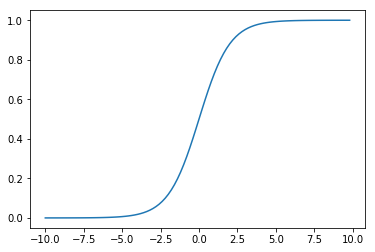

In [3]:
def sigmoid(x):    
    return 1/(1 + np.exp(-x))

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

In [23]:
df = pd.read_csv("./data/career_salary_paid.csv")
df.head()

,career,salary,paid
0,0.7,48000.0,1.0
1,1.9,48000.0,0.0
2,2.5,60000.0,1.0
3,4.2,63000.0,0.0
4,6.0,76000.0,0.0


In [40]:
data = np.array(df)

In [41]:
paid_data = data[np.where(data[:,2] == 1)]
unpaid_data = data[np.where(data[:,2] == 0)]

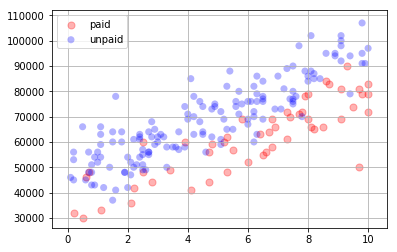

In [42]:
fig, ax = plt.subplots()

x, y = paid_data[:,0], paid_data[:,1]
ax.scatter(x, y, c="red", s=scale, label="paid",alpha=0.3)
x, y = unpaid_data[:,0],unpaid_data[:,1]
ax.scatter(x, y, c="blue", s=scale, label="unpaid", alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

In [44]:
from sklearn.preprocessing import normalize

data[:, :2] = normalize(data[:, :2], axis=0)
data[:5]

array([[ 0.00861027,  0.04956583,  1.        ],
       [ 0.02337075,  0.04956583,  0.        ],
       [ 0.03075098,  0.06195729,  1.        ],
       [ 0.05166165,  0.06505516,  0.        ],
       [ 0.07380236,  0.07847924,  0.        ]])

In [55]:
# Add x_0
x_data = data[:,:2]
x_data = np.insert(x_data, 0, 1, axis = 1)

y_data = data[:,-1]
y_data = y_data.reshape(y_data.shape[0], 1)

In [56]:
print(x_data.shape, y_data.shape)

(200, 3) (200, 1)


### Sigmoid

$h_{\theta}(x) = \frac{1}{1+e^{-z}}$

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Hypothesis function

$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$

In [58]:
def hypothesis_function(x, theta):
    z = (np.dot(x,theta))    
    return sigmoid(z)

### Cost function

$J(\theta) = -\frac{1}{m}\Sigma_{i=1}^{m}[y^{(i)}log h_{\theta}(x^{(i)}) + (1-y^{(i)})log(1 - h_{\theta}(x^{(i)}))] $

In [59]:
def compute_cost(x, y, theta):
    m = y.shape[0]
    J = (-1.0 /m )* (y * np.log(hypothesis_function(x,theta)) + \
        + (1 - y) * np.log(1- hypothesis_function(x,theta))).sum()    
    return J

In [60]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):
        original_theta = theta
        for i in range(theta.size):
            partial_marginal = x[:, i].reshape(x.shape[0], 1) # x_{j}^{i}
            delta = hypothesis_function(x, original_theta) - y # h(x) - y
            grad_i = delta.T.dot(partial_marginal) 
            
            theta[i] = theta[i] - (alpha  * grad_i)
        
        if (_ % 100) == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [61]:
theta_initial = np.ones([3,1])
theta, cost_history, theta_history = minimize_gradient(
    x_data, y_data, theta_initial, 10000, 0.001)

In [62]:
theta

array([[-1.28927068],
       [ 6.59202529],
       [-2.48947029]])

In [64]:
sum((sigmoid(x_data.dot(theta)) > 0.5) == y_data) / len(y_data)

array([ 0.74])